<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий ревьювера</h1>

<font color='green'>  Привет, меня зовут Сергей Морозов, я буду делать ревью твоей работы. Предлагаю сразу общаться на "ты", если тебе удобно. Для начала я раскажу как я буду маркировать свои комментарии в твоей тетардке. Я буду использовать комментарии в ячейках "markdown" и при необходимости комментарии в коде. Пожалуйста не удаляй комментарии в работе, они еще пригодятся и тебе и мне. Спасибо! :



<div class="alert alert-block alert-success">
<b>Все ОК:</b> Зеленный блок указывает на то, что задание решено корректно
</div>


<div class="alert alert-block alert-warning">
<b>Можно улучшить:</b> Желтый блок указывает на то, что задание решено корректно, но какие-то вещи можно улучшить для большей эффективности работы, чистоты кода, поддержки и пр. В коде будет использовано обозначение #TODO
</div>




<div class="alert alert-block alert-danger">
<b>Нужно исправить:</b> Красный блок указывает на то, то в задании допещена ошибка, которая влияете на итоговые результаты и ее необходимо исправить. В коде будет использовано обозначение #FIXIT
</div>



<div class="alert alert-block alert-info">
<b>Для размышления:</b> В синем блоке, я буду указывать полезные рекомендации и ссылки на дополнительные материалы, надеюсь тебя они заинтересуют :).
</div>

<font color='green'> Если у тебя возникнут вопросы или ты будешь с чем-то не согласен, можешь писать прямо под комментариями, попробуем разобраться!    
    
<font color='green'>Эта работа большой шаг на пути к профессии в ней рассматривается то, проводить анализ бизнес показателей и как принимать бизнес-решения на их основе и ты проделал очень большую работу, давай посмотрим вместе ее результаты:

#                                            ПРОЕКТ

Цель: помочь снизить расходы в отделе маркетинговой аналитики Яндекс.Афиши — отказаться от невыгодных источников трафика
и перераспределить бюджет.

Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:

лог сервера с данными о посещениях сайта Яндекс.Афиши,

выгрузка всех заказов за этот период,

статистика рекламных расходов.

Необходимо изучить:
    
как клиенты пользуются сервисом,

когда делают первые покупки на сайте,

сколько денег приносит компании каждый клиент,

когда расходы на привлечение клиента окупаются.

Выручка измеряется в условных единицах — у.е.

## Загружаем данные и готовим их к анализу

In [293]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [294]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий ревьювера</h1>

<div class="alert alert-block alert-success">
<b>Все ОК:</b> Отлично данные загружены! Пора приступать к их изучению!

### Предобработка visits

In [295]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [296]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [297]:
visits.duplicated().sum()

0

#### Меняем названия столбцов

In [298]:
visits.columns.to_list()

['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid']

In [299]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [300]:
#visits.rename(columns={'Device' : 'device', 'End Ts' : 'end_ts', 'Source Id' :'source_id', 'Start Ts' : 'start_ts', 'Uid' : 'uid'})

<div style="border:solid orange 2px; padding: 20px"> <h1 style="color:orange; margin-bottom:20px">Комментарий ревьювера</h1>

<div class="alert alert-block alert-warning">
<b>Можно улучшить:</b> Такой способ замены наименований столбцов не очень надежен, если в исходном файле измениться последовательность столбцов последующей код будет выполнен некорректно. Рекомендую использовать тебе метод DataFrame.rename(columns={...})

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий ревьювера #2</h1>

<div class="alert alert-block alert-success">
<b>Все ОК:</b> Странно почему ты код изменил, но закоментировал его ...

In [301]:
visits = visits[['device', 'source_id', 'uid', 'start_ts', 'end_ts']]

#### Приводим даты в порядок

In [302]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format = '%Y-%m-%d %H:%M:%S')

In [303]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format = '%Y-%m-%d %H:%M:%S')

In [304]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
source_id    359400 non-null int64
uid          359400 non-null uint64
start_ts     359400 non-null datetime64[ns]
end_ts       359400 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


### Предобработка orders

In [305]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [306]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [307]:
orders.duplicated().sum()

0

#### Меняем названия столбцов

In [308]:
orders.columns.to_list()

['Buy Ts', 'Revenue', 'Uid']

In [309]:
orders.columns = ['purchase_ts', 'revenue', 'uid']

In [310]:
#orders.rename(columns={'Buy Ts' : 'purchase_ts', 'Revenue' : 'revenue', 'Uid' : 'uid'})

In [311]:
orders = orders[['uid', 'revenue', 'purchase_ts']]

#### Приводим даты в порядок

In [312]:
orders['purchase_ts'] = pd.to_datetime(orders['purchase_ts'], format = '%Y-%m-%d %H:%M:%S')

In [313]:
orders.tail()

,uid,revenue,purchase_ts
50410,12296626599487328624,4.64,2018-05-31 23:50:00
50411,11369640365507475976,5.80,2018-05-31 23:50:00
50412,1786462140797698849,0.30,2018-05-31 23:54:00
50413,3993697860786194247,3.67,2018-05-31 23:56:00
50414,83872787173869366,3.42,2018-06-01 00:02:00


In [314]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
uid            50415 non-null uint64
revenue        50415 non-null float64
purchase_ts    50415 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


### Предобработка costs

In [315]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [316]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [317]:
costs.duplicated().sum()

0

#### Меняем названия столбцов

In [318]:
costs.columns.to_list()

['source_id', 'dt', 'costs']

In [319]:
costs.columns = ['source_id', 'date', 'costs']

In [320]:
#costs.rename(columns={'source_id' : 'source_id', 'dt' : 'date', 'costs' : 'costs'})

In [321]:
costs = costs[['source_id', 'costs', 'date']]

#### Приводим даты в порядок

In [322]:
costs['date'] = pd.to_datetime(costs['date'], format = '%Y-%m-%d')

In [323]:
costs.tail()

,source_id,costs,date
2537,10,9.92,2018-05-27
2538,10,21.26,2018-05-28
2539,10,11.32,2018-05-29
2540,10,33.15,2018-05-30
2541,10,17.60,2018-05-31


In [324]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
costs        2542 non-null float64
date         2542 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


<div style="border:solid orange 2px; padding: 20px"> <h1 style="color:orange; margin-bottom:20px">Комментарий ревьювера</h1>

<div class="alert alert-block alert-warning">
<b>Можно улучшить:</b> Данные просмотрены и предобработаны. Обрати внимаение, на то что ты выполнил  одни и те же операции с тремя файлами, это явный намек на то что хорошо бы все проведенные опреации обернуть в какую-нибудь функцию.

## Рассчитаем метрики и построим графики

### Продуктовые метрики

#### Рассчитываем DAU, WAU, MAU.

In [325]:
visits.head()

,device,source_id,uid,start_ts,end_ts
0,touch,4,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00
1,desktop,2,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00
2,touch,5,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00
3,desktop,9,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00
4,desktop,3,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00


In [326]:
visits['date'] = visits['start_ts'].dt.date
visits['day_number'] = visits['start_ts'].dt.day
visits['month'] = visits['start_ts'].dt.month
visits['year'] = visits['start_ts'].dt.year
visits['week_number'] = visits['start_ts'].dt.week
visits['day_of_week'] = visits['start_ts'].dt.day_name()
visits['month_name'] = visits['start_ts'].dt.month_name()

In [327]:
visits.head()

,device,source_id,uid,start_ts,end_ts,date,day_number,month,year,week_number,day_of_week,month_name
0,touch,4,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017-12-20,20,12,2017,51,Wednesday,December
1,desktop,2,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018-02-19,19,2,2018,8,Monday,February
2,touch,5,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-07-01,1,7,2017,26,Saturday,July
3,desktop,9,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018-05-20,20,5,2018,20,Sunday,May
4,desktop,3,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00,2017-12-27,27,12,2017,52,Wednesday,December


In [328]:
visits['date']  = visits['start_ts'].astype('datetime64[D]')

In [329]:
day = visits.groupby('date').agg({'uid': 'nunique'}).reset_index()

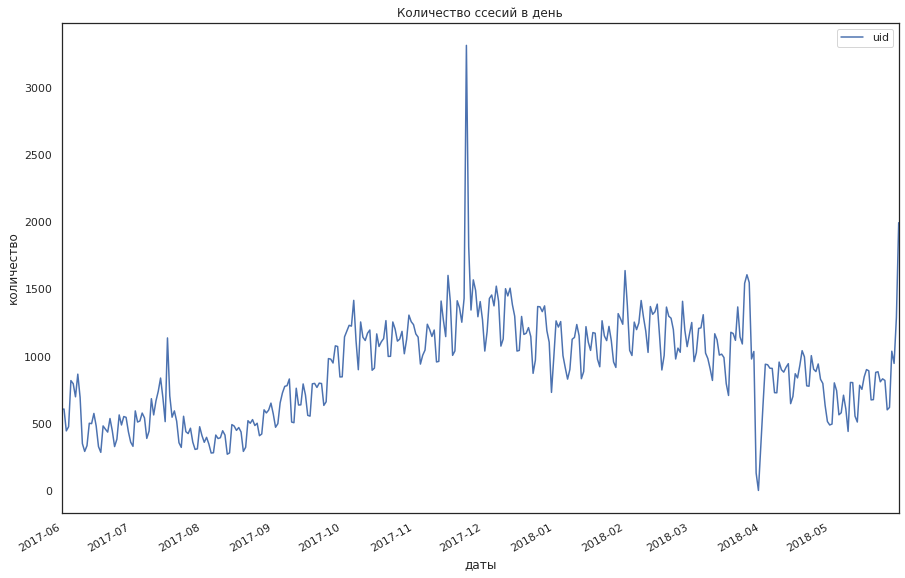

In [330]:
day.plot.line(x='date', y='uid', figsize=(15, 10))
plt.title('Количество ссесий в день')
plt.xlabel('даты')
plt.ylabel('количество')
plt.show()

In [331]:
DAU = visits.groupby('date').agg({'uid': 'nunique'}).mean()
print("Ежедневная аудитория DAU {0:.0f} человек".format(DAU[0]))

Ежедневная аудитория DAU 908 человек


In [332]:
visits['week']  = visits['start_ts'].astype('datetime64[W]')

In [333]:
week = visits.groupby('week').agg({'uid': 'nunique'}).reset_index()

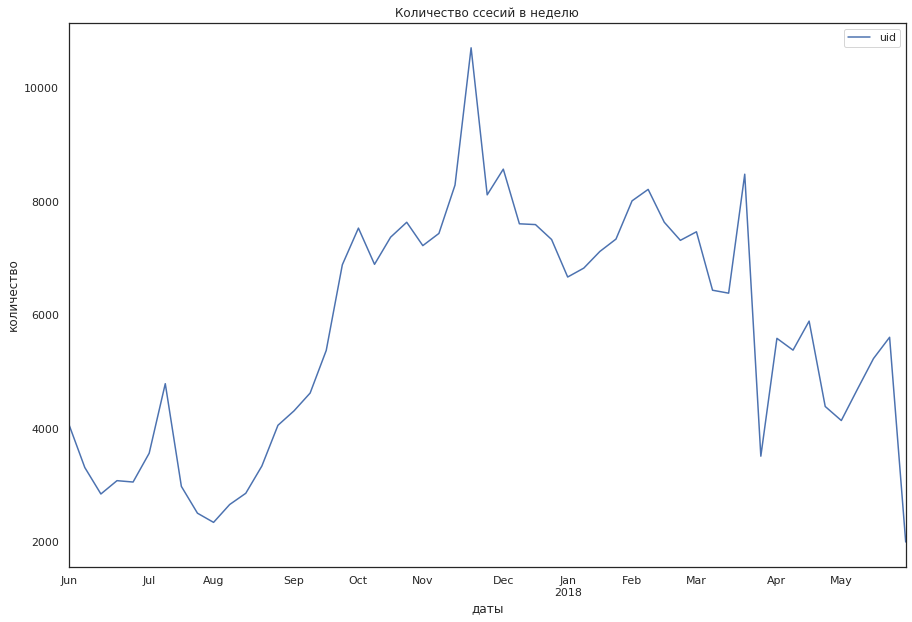

In [334]:
week.plot.line(x='week', y='uid', figsize=(15, 10))
plt.title('Количество ссесий в неделю')
plt.xlabel('даты')
plt.ylabel('количество')
plt.show()

In [335]:
WAU = visits.groupby('week_number').agg({'uid': 'nunique'}).mean()
print("Еженедельная аудитория WAU {0:.0f} человек".format(WAU[0]))

Еженедельная аудитория WAU 5825 человек


In [336]:
visits['month']  = visits['start_ts'].astype('datetime64[M]')

In [337]:
month = visits.groupby('month').agg({'uid': 'nunique'}).reset_index()

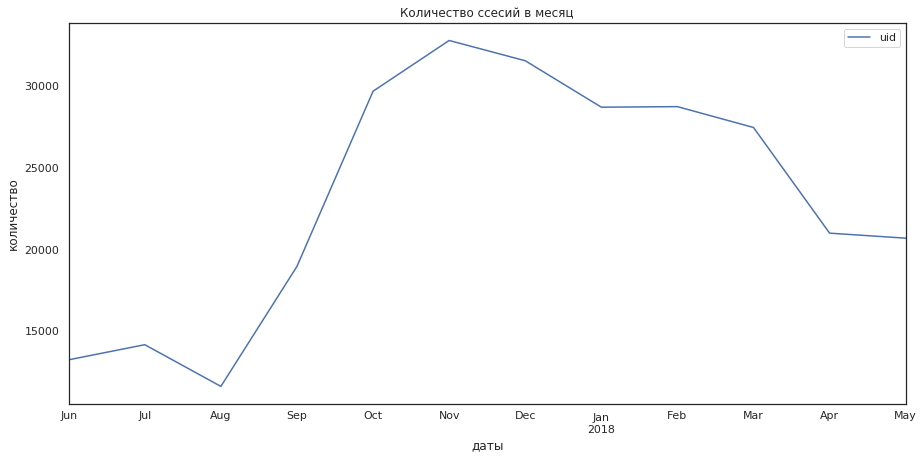

In [338]:
month.plot.line(x='month', y='uid', figsize=(15, 7))
plt.title('Количество ссесий в месяц')
plt.xlabel('даты')
plt.ylabel('количество')
plt.show()

In [339]:
MAU = visits.groupby('month').agg({'uid': 'nunique'}).mean()
print("Ежемесячная аудитория MAU {0:.0f} человек".format(MAU[0]))

Ежемесячная аудитория MAU 23228 человек


<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий ревьювера</h1>
<div class="alert alert-block alert-success">
<b>Все ОК:</b> MAU, WAU, DAU  расчитаны верно!
</div>

####  Сколько сессий в день

In [340]:
visits['day_number']  = visits['start_ts'].astype('datetime64[D]')

In [341]:
sessions_per_user = visits.groupby(['year', 'month', 'day_number']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = (sessions_per_user['n_sessions'] / sessions_per_user['n_users']).round(2)
sessions_per_user['n_sessions_per_day'] = (sessions_per_user['n_sessions'] / 30).round()
sessions_per_user = sessions_per_user.reset_index()

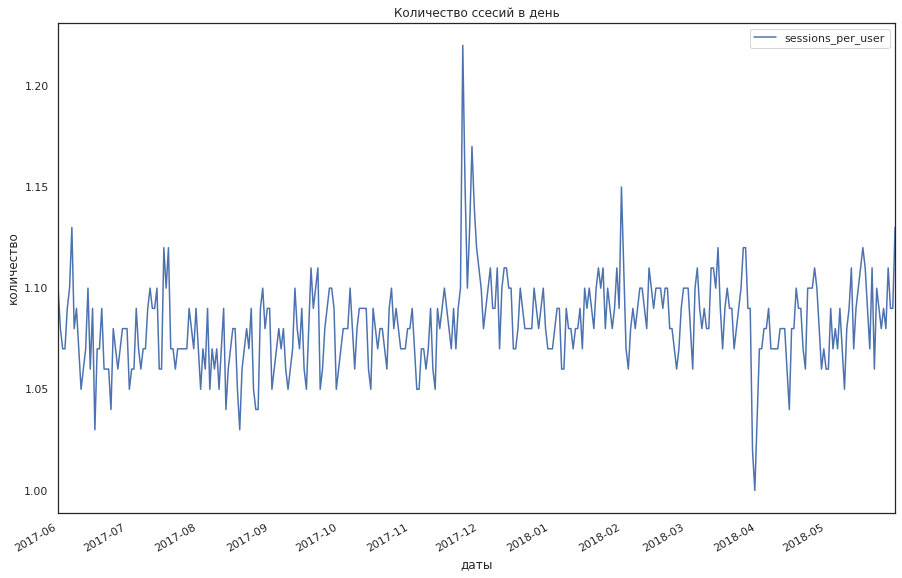

In [342]:
sessions_per_user.plot(x='day_number', y='sessions_per_user', figsize= (15, 10))
plt.title('Количество ссесий в день')
plt.xlabel('даты')
plt.ylabel('количество')
plt.show()

<div style="border:solid red 2px; padding: 20px"> <h1 style="color:red; margin-bottom:20px">Комментарий ревьювера</h1>
<div class="alert alert-block alert-danger">
<b>Нужно исправить:</b>Что-то не пойму, задание 2.1.2. звучит следуюшим обраом "Определите, сколько раз за день пользователи в среднем заходят на сайт. Постройте график, отражающий изменения метрики во времени" - тоесть тебе нужно определить не сколько сессий  происходит в день, а отношение этих сессий к количеству уникальных пользователей.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий ревьювера #2</h1>

<div class="alert alert-block alert-success">
<b>Все ОК:</b>  Теперь все верно!

#### Сколько длится одна сессия

In [343]:
visits['session_duration_minutes'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds() / 60

In [344]:
visits['session_duration_minutes'].describe()

count    359400.000000
mean         10.717095
std          16.618796
min         -46.000000
25%           2.000000
50%           5.000000
75%          14.000000
max         711.000000
Name: session_duration_minutes, dtype: float64

 Удаляем отрицательные сессии

In [345]:
visits = visits.query('session_duration_minutes >= 0')

In [346]:
visits['session_duration_minutes'].describe()

count    359398.000000
mean         10.717371
std          16.618420
min           0.000000
25%           2.000000
50%           5.000000
75%          14.000000
max         711.000000
Name: session_duration_minutes, dtype: float64

In [347]:
visits['session_duration_minutes'].mode()

0    1.0
dtype: float64

Вывод: сессия длится:
    
- в среднем более 10 минут
- в медианном 5 минут
- в модном 1 минуту

Наблюдается пик активности количества ссесий перед Новым годом. Люди покупают подарки.

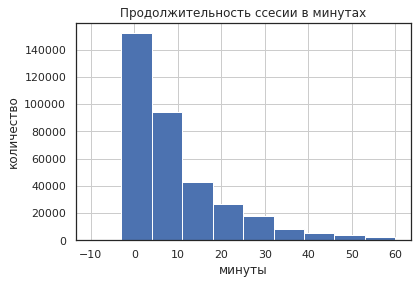

In [348]:
visits['session_duration_minutes'].hist(bins=10, range=(-10, 60))
plt.title('Продолжительность ссесии в минутах')
plt.xlabel('минуты')
plt.ylabel('количество')
plt.show()

Вывод: большинство ссесий до 5 минут

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий ревьювера</h1>
<div class="alert alert-block alert-success">
<b>Все ОК:</b> Все верно, сесси совсем короткие!

#### Рассчитаем коэффициент удержания

In [349]:
first_visit = visits.groupby(['uid'])['start_ts'].min().reset_index()
first_visit.columns = ['uid', 'first_visit']
first_visit.head()

,uid,first_visit
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [350]:
visits = visits.merge(first_visit)
visits.head()

,device,source_id,uid,start_ts,end_ts,date,day_number,month,year,week_number,day_of_week,month_name,week,session_duration_minutes,first_visit
0,touch,4,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017-12-20,2017-12-20,2017-12-01,2017,51,Wednesday,December,2017-12-14,18.0,2017-12-20 17:20:00
1,desktop,2,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018-02-19,2018-02-19,2018-02-01,2018,8,Monday,February,2018-02-15,28.0,2018-02-19 16:53:00
2,touch,5,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-07-01,2017-07-01,2017-07-01,2017,26,Saturday,July,2017-06-29,0.0,2017-07-01 01:54:00
3,desktop,9,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018-05-20,2018-05-20,2018-05-01,2018,20,Sunday,May,2018-05-17,24.0,2018-03-09 20:05:00
4,desktop,4,16174680259334210214,2018-03-09 20:05:00,2018-03-09 20:33:00,2018-03-09,2018-03-09,2018-03-01,2018,10,Friday,March,2018-03-08,28.0,2018-03-09 20:05:00


In [351]:
visits['first_visit_month'] = visits['first_visit'].astype('datetime64[M]')
visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')

In [352]:
visits.head()

,device,source_id,uid,start_ts,end_ts,date,day_number,month,year,week_number,day_of_week,month_name,week,session_duration_minutes,first_visit,first_visit_month,visit_month
0,touch,4,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017-12-20,2017-12-20,2017-12-01,2017,51,Wednesday,December,2017-12-14,18.0,2017-12-20 17:20:00,2017-12-01,2017-12-01
1,desktop,2,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018-02-19,2018-02-19,2018-02-01,2018,8,Monday,February,2018-02-15,28.0,2018-02-19 16:53:00,2018-02-01,2018-02-01
2,touch,5,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-07-01,2017-07-01,2017-07-01,2017,26,Saturday,July,2017-06-29,0.0,2017-07-01 01:54:00,2017-07-01,2017-07-01
3,desktop,9,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018-05-20,2018-05-20,2018-05-01,2018,20,Sunday,May,2018-05-17,24.0,2018-03-09 20:05:00,2018-03-01,2018-05-01
4,desktop,4,16174680259334210214,2018-03-09 20:05:00,2018-03-09 20:33:00,2018-03-09,2018-03-09,2018-03-01,2018,10,Friday,March,2018-03-08,28.0,2018-03-09 20:05:00,2018-03-01,2018-03-01


In [353]:
visits['lifetime'] = (visits['visit_month'] - visits['first_visit_month']) / np.timedelta64(1, 'M')
visits['lifetime'] = visits['lifetime'].round().astype('int')

In [354]:
cohort_visits = visits.groupby(['first_visit_month', 'lifetime']).agg({'uid': 'nunique'}).reset_index()
f_uid = cohort_visits[cohort_visits['lifetime'] == 0][['first_visit_month', 'uid']]
f_uid.columns = ['first_visit_month', 'f_uid']
f_uid.head()

,first_visit_month,f_uid
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


In [355]:
cohort_visits = cohort_visits.merge(f_uid)
cohort_visits['retention'] = cohort_visits['uid'] / cohort_visits['f_uid']
visits_retention_pivot = cohort_visits.pivot_table(index = 'first_visit_month', 
                                                   columns = 'lifetime', values = 'retention', aggfunc = 'sum')

visits_retention_pivot.mean() * 100

lifetime
0     100.000000
1       6.516660
2       4.633262
3       4.275990
4       4.059457
5       3.944383
6       3.695659
7       3.750912
8       3.546465
9       3.515906
10      3.406250
11      4.495060
dtype: float64

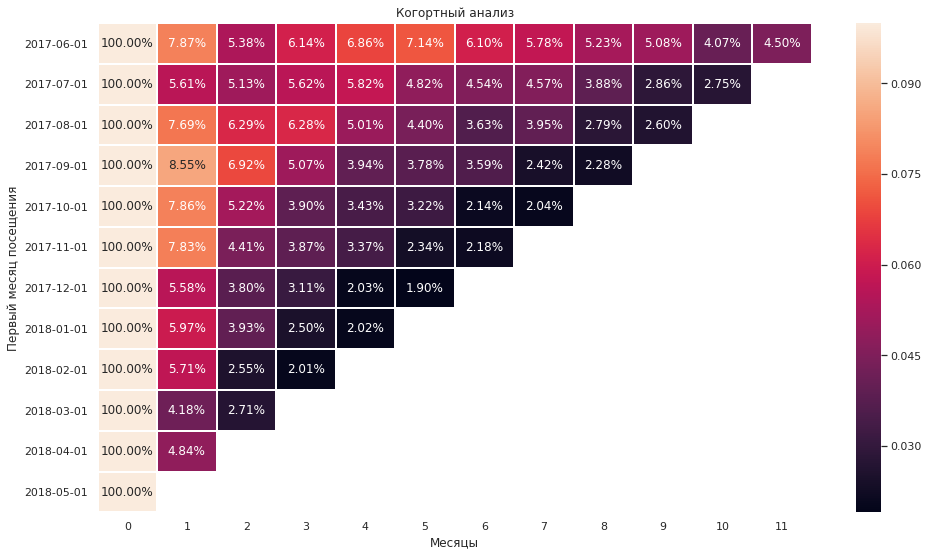

In [356]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (16, 9))

ax = sns.heatmap(visits_retention_pivot, annot=True, fmt='.2%', linewidths=1, linecolor='white', vmax =0.1)
ax.set_yticklabels(visits_retention_pivot.index.date)

plt.title('Когортный анализ')
plt.xlabel('Месяцы')
plt.ylabel('Первый месяц посещения')
plt.show()

Вывод: наиболее активные когорты - сентябрьская,октябрьская и ноябрьская. Люди вернулись из летних отпусков, поэтому большее
    количество готовы куда-нибудь сходить.
    

<div style="border:solid orange 2px; padding: 20px"> <h1 style="color:orange; margin-bottom:20px">Комментарий ревьювера</h1>

<div class="alert alert-block alert-warning">
<b>Можно улучшить:</b>Retention Rate расчитан верно. Для того чтобы график не выглядил "монохромным" можно если добавить параметр vmax равным например 0.1, что отрегулирует верхнее значение цветовой шаклы.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий ревьювера #2</h1>
<div class="alert alert-block alert-success">
<b>Все ОК:</b> Отлично! так график выглядит гораздо более читаемым!

### Метрики электронной комерции

#### Рассчитаем время с момента первого посещения сайта до покупки

In [357]:
orders.head()

,uid,revenue,purchase_ts
0,10329302124590727494,17.00,2017-06-01 00:10:00
1,11627257723692907447,0.55,2017-06-01 00:25:00
2,17903680561304213844,0.37,2017-06-01 00:27:00
3,16109239769442553005,0.55,2017-06-01 00:29:00
4,14200605875248379450,0.37,2017-06-01 07:58:00


In [358]:
visits.head()

,device,source_id,uid,start_ts,end_ts,date,day_number,month,year,week_number,day_of_week,month_name,week,session_duration_minutes,first_visit,first_visit_month,visit_month,lifetime
0,touch,4,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017-12-20,2017-12-20,2017-12-01,2017,51,Wednesday,December,2017-12-14,18.0,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018-02-19,2018-02-19,2018-02-01,2018,8,Monday,February,2018-02-15,28.0,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,5,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-07-01,2017-07-01,2017-07-01,2017,26,Saturday,July,2017-06-29,0.0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,9,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018-05-20,2018-05-20,2018-05-01,2018,20,Sunday,May,2018-05-17,24.0,2018-03-09 20:05:00,2018-03-01,2018-05-01,2
4,desktop,4,16174680259334210214,2018-03-09 20:05:00,2018-03-09 20:33:00,2018-03-09,2018-03-09,2018-03-01,2018,10,Friday,March,2018-03-08,28.0,2018-03-09 20:05:00,2018-03-01,2018-03-01,0


In [359]:
first_visit = visits.groupby('uid').agg({'start_ts':'min'})\
                .rename(columns={'start_ts':'first_visit_date'})\
                .reset_index()

In [360]:
first_order = orders.groupby('uid').agg({'purchase_ts':'min'})\
                .rename(columns={'purchase_ts':'first_purchase_date'})\
                .reset_index()

In [361]:
buying_time = first_visit.merge(first_order, on='uid', how='inner')

In [362]:
buying_time.head()

,uid,first_visit_date,first_purchase_date
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


In [363]:
buying_time['buying_time'] = (buying_time['first_purchase_date'] - buying_time['first_visit_date']).dt.seconds / 60

In [364]:
buying_time.head()

,uid,first_visit_date,first_purchase_date,buying_time
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,1382.0
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0.0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,79.0
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,1184.0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0.0


In [365]:
buying_time['buying_time'].mode()

0    1.0
dtype: float64

In [366]:
buying_time['buying_time'].describe()

count    36523.000000
mean       249.164691
std        429.742785
min          0.000000
25%          4.000000
50%         16.000000
75%        252.000000
max       1439.000000
Name: buying_time, dtype: float64

In [367]:
buying_time[buying_time['buying_time'] == 0].count()

uid                    2467
first_visit_date       2467
first_purchase_date    2467
buying_time            2467
dtype: int64

Text(0.5, 1.0, 'Время в минутах от первого визита до покупки')

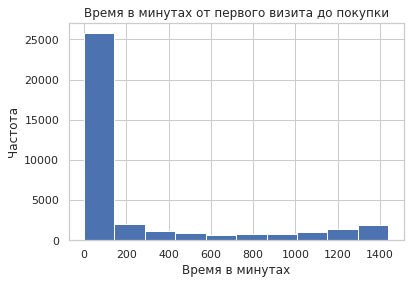

In [368]:
ax = buying_time['buying_time'].hist()
ax.set_xlabel('Время в минутах')
ax.set_ylabel('Частота')
ax.set_title('Время в минутах от первого визита до покупки')

Люди начинают покупать:
    
- в среднем через 249 минут
- в медианном через 16 минут
- модальное время до совершения покупки - 1 минута

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий ревьювера</h1>
<div class="alert alert-block alert-success">
<b>Все ОК:</b> Все верно! Покупки совершаются практически  в тот же день. "в модном" - не совсем корректный термин, правильнее указать "модальное время до совершение покупки".

#### Среднее количество покупок на одного покупателя

In [369]:
orders['order_month'] = orders['purchase_ts'].astype('datetime64[M]')
costs['month'] = costs['date'].astype('datetime64[M]')

In [370]:
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

In [371]:
cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']

In [372]:
orders_first_month = pd.merge(orders, first_orders, on='uid')
cohorts = orders_first_month.groupby(['first_order_month','order_month']).agg({'uid' : 'count'}).reset_index()
cohorts = cohorts.rename(columns = {'uid': 'sum_orders',})
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

In [373]:
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

In [374]:
report['orders_for_one'] = report['sum_orders'] / report['n_buyers']

In [375]:
result = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='orders_for_one', 
    aggfunc='mean')
 
result.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.163618,0.0874938,0.0860109,0.111715,0.14434,0.107761,0.136431,0.0860109,0.104795,0.0756303,0.0474543,0.0425111
2017-07-01,1.136765,0.0520021,0.0624025,0.0540822,0.0374415,0.0426417,0.0317213,0.026001,0.0301612,0.0124805,0.0275611,
2017-08-01,1.118978,0.0788321,0.0729927,0.0591241,0.0620438,0.0452555,0.0357664,0.0569343,0.0335766,0.0335766,,
2017-09-01,1.136381,0.0848508,0.0623789,0.0635413,0.0259589,0.0422317,0.0418442,0.021697,0.0236343,,,
2017-10-01,1.143779,0.0723502,0.0373272,0.0281106,0.0297235,0.0237327,0.0198157,0.0288018,,,,
2017-11-01,1.179368,0.0972801,0.0445969,0.051703,0.0333252,0.0144572,0.0249939,,,,,
2017-12-01,1.152635,0.0616016,0.0460872,0.0408396,0.0196213,0.0239562,,,,,,
2018-01-01,1.121554,0.0664097,0.047139,0.0189742,0.0231248,,,,,,,
2018-02-01,1.121611,0.0608053,0.0227335,0.0191728,,,,,,,,


In [376]:
m6_cum_orders_for_one = result.cumsum(axis=1).mean(axis=0)[5]
 
print('среднее количество покупок на одного покупателя за 6 месяцев после первой покупки:', m6_cum_orders_for_one)

среднее количество покупок на одного покупателя за 6 месяцев после первой покупки: 1.4341911542792218


<div style="border:solid red 2px; padding: 20px"> <h1 style="color:red; margin-bottom:20px">Комментарий ревьювера</h1>
<div class="alert alert-block alert-danger">
<b>Нужно исправить:</b> Тут твои расчеты не совсем верные согласно заданию 2.2.2. тебе неободимо "...рассчитайте среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев..." а ты расчитываешь количество uid совершивших покупки по дням, неделям и месяцам.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий ревьювера #2</h1>

<div class="alert alert-block alert-success">
<b>Все ОК:</b> Теперь все верно! За полгода всего 43% пользователь покупают второй раз.

#### Средний чек

In [377]:
orders_and_visits= orders.merge(first_visit)

In [378]:
orders_and_visits['revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

In [379]:
orders_and_visits['revenue'].mode()

0    1.83
dtype: float64

In [380]:
orders_and_visits.head()

,uid,revenue,purchase_ts,order_month,first_visit_date
0,10329302124590727494,17.00,2017-06-01 00:10:00,2017-06-01,2017-06-01 00:09:00
1,11627257723692907447,0.55,2017-06-01 00:25:00,2017-06-01,2017-06-01 00:14:00
2,17903680561304213844,0.37,2017-06-01 00:27:00,2017-06-01,2017-06-01 00:25:00
3,16109239769442553005,0.55,2017-06-01 00:29:00,2017-06-01,2017-06-01 00:14:00
4,14200605875248379450,0.37,2017-06-01 07:58:00,2017-06-01,2017-06-01 07:31:00


In [381]:
orders_and_visits['purchase_month'] = orders_and_visits['purchase_ts'].dt.month

In [382]:
mean_purchase_by_month = orders_and_visits.groupby('purchase_month').agg({'revenue': 'mean'})

In [383]:
month_lst = ['June', 'July', 'August', 'September', 'October', 'November', \
             'December', 'January', 'February', 'March', 'April', 'May']

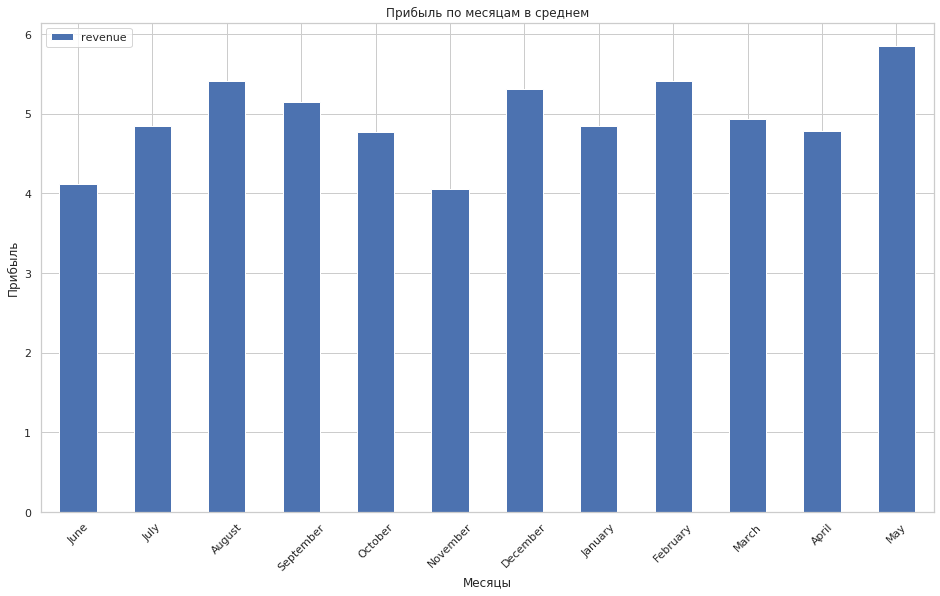

In [384]:
ax = mean_purchase_by_month.plot(kind='bar', figsize=(16, 9))
ax.set_xticklabels(month_lst, rotation=45)
plt.title('Прибыль по месяцам в среднем')
ax.set_xlabel('Месяцы')
ax.set_ylabel('Прибыль')
plt.show()

Вывод:
Средний чек : от 4 до 6, мода 1.83. Наибольший средний чек в мае, по окончании весны всё больше мероприятий проходит на
    открытом воздухе.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий ревьювера</h1>
<div class="alert alert-block alert-success">
<b>Все ОК:</b> В этом шаге все верно! Молодец!

#### Изменение LTV по кагортам.

#### LTV в каждый отдельный месяц

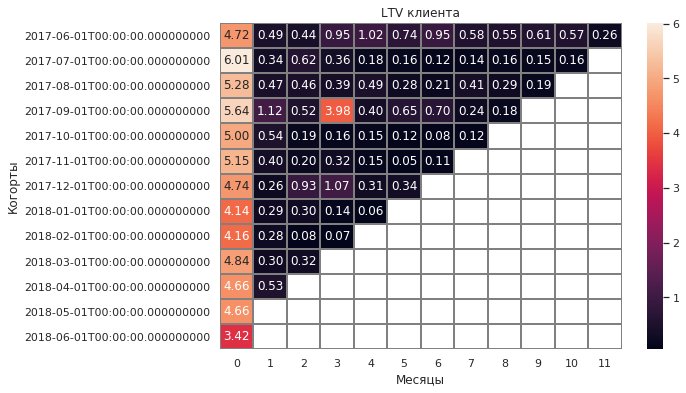

In [385]:
orders_monthly = orders
orders_monthly['purchase_ts'] = orders_monthly['purchase_ts'].astype('datetime64[M]')

first_orders_month = orders_monthly.groupby('uid').agg({'purchase_ts': 'min'}).reset_index()
first_orders_month.columns = ['uid', 'first_order']

cohort_sizes = first_orders_month.groupby('first_order').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order', 'n_buyers']

orders_first_orders_month = orders.merge(first_orders_month, on='uid')
cohorts = (orders_first_orders_month
                                    .groupby(['purchase_ts', 'first_order'])
                                    .agg({'revenue': 'sum', 'uid': 'nunique'})
                                    .reset_index()
          )

margin_rate = 1.0
LTV = cohorts.merge(cohort_sizes, on='first_order')
LTV['gp'] = LTV['revenue'] * margin_rate
LTV['age'] = (LTV['purchase_ts'] - LTV['first_order']) / np.timedelta64(1, 'M')
LTV['age'] = LTV['age'].round().astype('int')
LTV['ltv'] = LTV['gp'] / LTV['n_buyers']
LTV_pivot = LTV.pivot_table(index="first_order",
                columns="age",
                values="ltv",
                aggfunc='mean')
plt.figure(figsize=(9, 6))

sns.heatmap(LTV_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray')

plt.title('LTV клиента')
plt.xlabel('Месяцы')
plt.ylabel('Когорты')
plt.show()

#### LTV накопительный

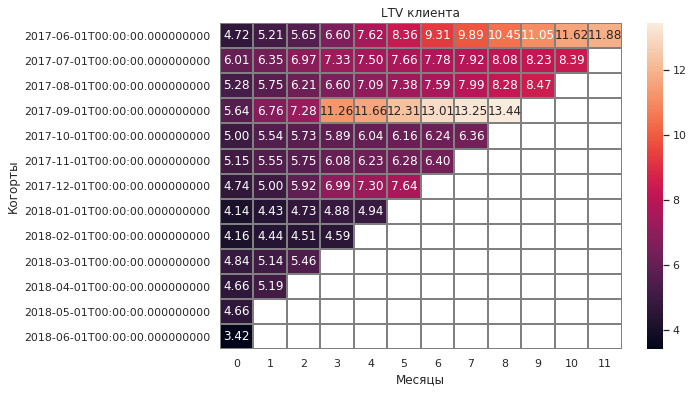

In [386]:
ltv_1 = LTV_pivot.cumsum(axis=1)
plt.figure(figsize=(9, 6))

sns.heatmap(ltv_1, annot=True, fmt='.2f', linewidths=1, linecolor='gray')

plt.title('LTV клиента')
plt.xlabel('Месяцы')
plt.ylabel('Когорты')
plt.show()

Вывод: первая когорта самая стабильная - практически в каждом месяце она показывала лучший результат по LTV среди всех когорт.
    Вызвано это тем, что именно эта когорта показывает лучший показатель Retention. По 4-й когорте (сентябрьской) необходимо
    исследовать 3-й месяц её жизни - там у нас аномальный всплеск месячного значения LTV.

<div style="border:solid orange 2px; padding: 20px"> <h1 style="color:orange; margin-bottom:20px">Комментарий ревьювера</h1>

<div class="alert alert-block alert-warning">
<b>Можно улучшить:</b> LTV расчитан корректно, вот только не понятно почему в подписях к графикам ты указал "Среднее кол-во заказов..." LTV - это показатель ценности которую  клиент приносит компании на  протяжении времени жизни.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий ревьювера #2</h1>

<div class="alert alert-block alert-success">
<b>Все ОК:</b> Так другое дело!

### Маркетинговые метрики

#### Сумма расходов на маркетинг

Общая сумма:

In [387]:
costs['costs'].sum()

329131.62

Траты по источникам

In [388]:
costs_by_source = costs.groupby('source_id')['costs'].sum().reset_index()

In [389]:
costs_by_source['in_percents'] = costs_by_source['costs'] / 329131.62 * 100

In [390]:
costs_by_source.sort_values('in_percents', ascending = False)

,source_id,costs,in_percents
2,3,141321.63,42.937725
3,4,61073.60,18.555981
4,5,51757.10,15.725350
1,2,42806.04,13.005751
0,1,20833.27,6.329769
6,10,5822.49,1.769046
5,9,5517.49,1.676378


In [391]:
costs.head()

,source_id,costs,date,month
0,1,75.20,2017-06-01,2017-06-01
1,1,62.25,2017-06-02,2017-06-01
2,1,36.53,2017-06-03,2017-06-01
3,1,55.00,2017-06-04,2017-06-01
4,1,57.08,2017-06-05,2017-06-01


Расходы по времени

In [392]:
costs['costs_month'] = costs['date'].astype('datetime64[M]').dt.date

In [393]:
costs_by_month = costs.groupby('costs_month')['costs'].sum().reset_index()
costs_by_month

,costs_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


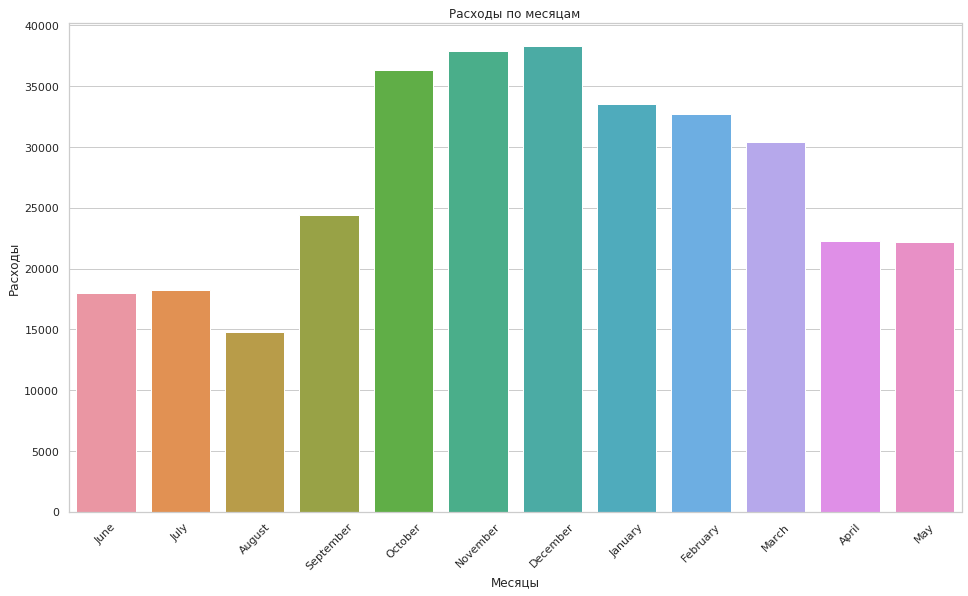

In [394]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="costs_month", y="costs", data=costs_by_month)
ax.set_xticklabels(month_lst, rotation=45)
plt.title('Расходы по месяцам')
ax.set_xlabel('Месяцы')
ax.set_ylabel('Расходы')
plt.show()

Вывод: наибольшие траты произошли в октябре, ноябре и декабре 2017 года. Самый затратный источник № 3, затем 4,5 и 2.

Всего потрачено на маркетинг 329131.62 $

Всего потрачено на каждый из источников


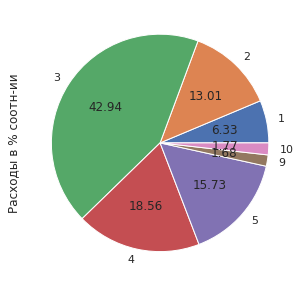

               costs
source_id           
1           20833.27
2           42806.04
3          141321.63
4           61073.60
5           51757.10
9            5517.49
10           5822.49


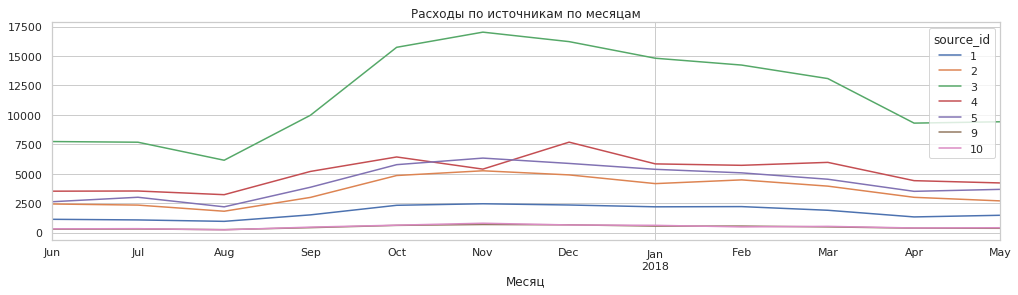

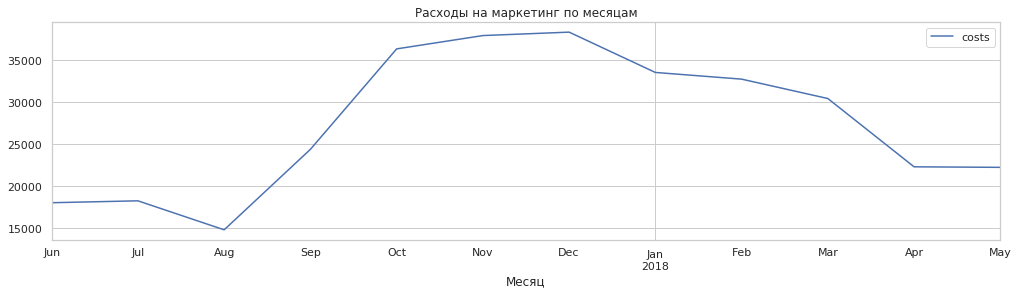

In [395]:
costs['cost_month'] = costs['date'].astype('datetime64[M]')
# costs['cost_month'] = costs['cost_month'].dt.strftime('%Y-%m')
print('Всего потрачено на маркетинг {} $'.format(costs['costs'].sum()))
print('\nВсего потрачено на каждый из источников')
costs.groupby('source_id').sum().plot(y = 'costs', autopct='%.2f', kind = 'pie', figsize = (5, 5), legend = False)
plt.ylabel('Расходы в % соотн-ии')
plt.show()
print(costs.groupby('source_id').sum())

costs_pivot = costs.pivot_table(index = 'cost_month', columns = 'source_id', values = 'costs', aggfunc = 'sum')
costs_pivot.plot(figsize = (17,4), title = 'Расходы по источникам по месяцам')
plt.xlabel('Месяц')
plt.show()

costs.pivot_table(index = 'cost_month', values = 'costs', aggfunc = 'sum').plot(title = 'Расходы на маркетинг по месяцам', figsize = (17,4))
plt.xlabel('Месяц')
plt.show()

<div style="border:solid red 2px; padding: 20px"> <h1 style="color:red; margin-bottom:20px">Комментарий ревьювера</h1>
<div class="alert alert-block alert-danger">
<b>Нужно исправить:</b>  В данном шаге также необходимо показать как меняются расходы по источникам во времени.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий ревьювера #2</h1>

<div class="alert alert-block alert-success">
<b>Все ОК:</b> Совсем другое дело! Кстати для отображения динамики по источникам можно использовать диаграмму "stacked area plot" ее можно отобразить добавив в вызов plot включевое слово kind='area':
    
    costs_pivot.plot(figsize = (17,4), kind='area', title = 'Расходы по источникам по месяцам')

#### Стоимость привлечения одного покупателя из каждого источника

In [396]:
costs_by_source = costs.groupby('source_id').agg({'costs':'sum'})
costs_by_source.reset_index()

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [397]:
visits_by_source = visits.query('start_ts == first_visit')
customers_by_source = (orders.merge(visits_by_source, on='uid', how='inner')).groupby('source_id').agg({'uid':'nunique'})\
                        .rename(columns={'uid':'customers'})

In [398]:
customers_by_source.reset_index()

,source_id,customers
0,1,2899
1,2,3506
2,3,10473
3,4,10296
4,5,6931
5,7,1
6,9,1088
7,10,1329


In [399]:
cac = customers_by_source.join(costs_by_source).reset_index()
cac

,source_id,customers,costs
0,1,2899,20833.27
1,2,3506,42806.04
2,3,10473,141321.63
3,4,10296,61073.60
4,5,6931,51757.10
5,7,1,NaN
6,9,1088,5517.49
7,10,1329,5822.49


In [400]:
cac = cac.fillna(0)

In [401]:
cac['cac'] = cac['costs'] / cac['customers']
cac.sort_values('cac', ascending = False)

,source_id,customers,costs,cac
2,3,10473,141321.63,13.493901
1,2,3506,42806.04,12.209367
4,5,6931,51757.10,7.467479
0,1,2899,20833.27,7.186364
3,4,10296,61073.60,5.931779
6,9,1088,5517.49,5.071222
7,10,1329,5822.49,4.381106
5,7,1,0.00,0.000000


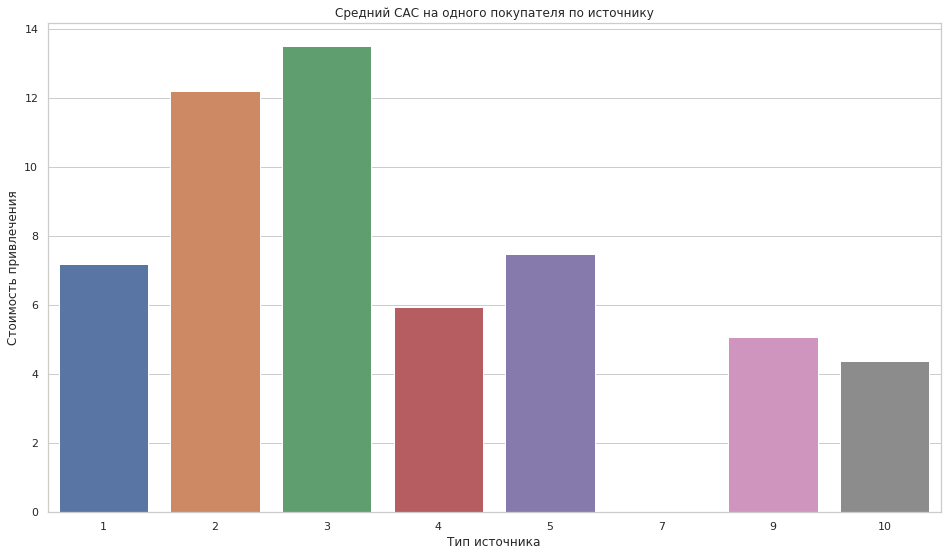

In [402]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="source_id", y="cac", data=cac)
plt.title('Средний CAC на одного покупателя по источнику')
ax.set_xlabel('Тип источника')
ax.set_ylabel('Стоимость привлечения')
plt.show()

Вывод: больше всего покупателей пришли благодаря 3 и 2 источникам.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий ревьювера</h1>
<div class="alert alert-block alert-success">
<b>Все ОК:</b>  Молодец! CAC расчитан верно!

#### Рассчитаем ROMI по источникам

In [403]:
costs_by_source.reset_index()

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [404]:
revenue_by_source = (orders.merge(visits_by_source, on='uid', how='inner')).groupby('source_id').agg({'revenue':'sum'})
revenue_by_source.reset_index()

,source_id,revenue
0,1,31090.55
1,2,46923.61
2,3,54511.24
3,4,56696.83
4,5,52624.02
5,7,1.22
6,9,5759.40
7,10,4450.33


In [405]:
romi = revenue_by_source.join(costs_by_source)
romi['romi'] = (romi['revenue'] - romi['costs']) / romi['costs']

In [406]:
romi.sort_values('romi', ascending = False)

,revenue,costs,romi
source_id,,,
1,31090.55,20833.27,0.492351
2,46923.61,42806.04,0.096191
9,5759.40,5517.49,0.043844
5,52624.02,51757.10,0.016750
4,56696.83,61073.60,-0.071664
10,4450.33,5822.49,-0.235665
3,54511.24,141321.63,-0.614275
7,1.22,NaN,NaN


Вывод: Лучший возврат на инвестиции в маркетинг - источник №1(ROMI= 0.49)

#### Рассчитаем ROMI по кагортам

In [407]:
sources_for_users = visits[['source_id', 'uid', 'start_ts']].copy()

In [408]:
first_order = orders.groupby(['uid']).agg({'order_month': ['min']}).reset_index()
first_order.columns = ['uid', 'first_order_month']
first_order_month = pd.merge(orders, first_order, on='uid')

In [409]:
first_order = orders.groupby(['uid']).agg({'order_month': ['min']}).reset_index()
first_order.columns = ['uid', 'first_order_month']
first_order_month = pd.merge(orders, first_order, on='uid')

In [410]:
#Определение первого ресурса для покупателя
first_user_source = sources_for_users.sort_values(by = ['start_ts']).groupby('uid').agg({'source_id' : 'first', 'start_ts' : 'first'}).reset_index()
sources_for_users = sources_for_users.sort_values('start_ts')

In [411]:
#Создание когорт по месяцу и маркетинговому источнику привлечения
cohorts_total = first_order_month.merge(first_user_source, how='left', on = ['uid'])
cohorts_total = cohorts_total.drop(['start_ts'], axis = 1)

In [412]:
cohorts_total

,uid,revenue,purchase_ts,order_month,first_order_month,source_id
0,10329302124590727494,17.00,2017-06-01,2017-06-01,2017-06-01,1
1,11627257723692907447,0.55,2017-06-01,2017-06-01,2017-06-01,2
2,17903680561304213844,0.37,2017-06-01,2017-06-01,2017-06-01,2
3,16109239769442553005,0.55,2017-06-01,2017-06-01,2017-06-01,2
4,14200605875248379450,0.37,2017-06-01,2017-06-01,2017-06-01,3
...,...,...,...,...,...,...
50410,12296626599487328624,4.64,2018-05-01,2018-05-01,2018-05-01,4
50411,11369640365507475976,5.80,2018-05-01,2018-05-01,2018-05-01,10
50412,1786462140797698849,0.30,2018-05-01,2018-05-01,2018-05-01,3
50413,3993697860786194247,3.67,2018-05-01,2018-05-01,2018-05-01,3


In [413]:
#Кол-во покупателей в когортах
cohorts_size = cohorts_total.groupby(['first_order_month', 'source_id'])['uid'].nunique().reset_index()
 
cohorts_total = cohorts_total.groupby(['order_month', 'first_order_month', 'source_id']).agg({'revenue': 'sum'}).reset_index()
cohorts_total['cohorts_age'] = ((cohorts_total['order_month'] - cohorts_total['first_order_month'])
                                /np.timedelta64(1, 'M')).round()
 
cohorts_total = cohorts_total.merge(cohorts_size, how='left', left_on=['first_order_month','source_id'], 
                                  right_on = ['first_order_month','source_id'])
cohorts_total = cohorts_total.rename(columns={"uid": "n_of__buyers"})

In [414]:
costs_pivot

source_id,1,2,3,4,5,9,10
cost_month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


In [415]:
#Расчет LTV
cohorts_total['ltv'] = cohorts_total['revenue'] / cohorts_total['n_of__buyers']
costs_pivot = costs.groupby('source_id').sum()

cohorts_total = pd.merge(costs_pivot, cohorts_total,  on ='source_id')                                 

In [416]:
cohorts_total

,source_id,costs,order_month,first_order_month,revenue,cohorts_age,n_of__buyers,ltv
0,1,20833.27,2017-06-01,2017-06-01,1378.70,0.0,190,7.256316
1,1,20833.27,2017-07-01,2017-06-01,414.98,1.0,190,2.184105
2,1,20833.27,2017-07-01,2017-07-01,1166.70,0.0,160,7.291875
3,1,20833.27,2017-08-01,2017-06-01,419.43,2.0,190,2.207526
4,1,20833.27,2017-08-01,2017-07-01,175.31,1.0,160,1.095687
...,...,...,...,...,...,...,...,...
510,10,5822.49,2018-05-01,2017-10-01,10.87,7.0,209,0.052010
511,10,5822.49,2018-05-01,2017-11-01,7.02,6.0,128,0.054844
512,10,5822.49,2018-05-01,2017-12-01,4.89,5.0,85,0.057529
513,10,5822.49,2018-05-01,2018-03-01,6.29,2.0,186,0.033817


In [417]:
#Расчет CAC
cohorts_total['cac'] = cohorts_total['costs'] / cohorts_total['n_of__buyers']

In [418]:
#Расчет ROMI
cohorts_total['romi'] = cohorts_total['ltv'] / cohorts_total['cac']
 
romi_pivot = cohorts_total.pivot_table(index='first_order_month', columns='cohorts_age', values='romi', aggfunc='mean')
romi_pivot = romi_pivot.cumsum(axis=1).round(2).fillna('')
romi_pivot

cohorts_age,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,0.04,0.04,0.05,0.06,0.07,0.08,0.09,0.09,0.1,0.1,0.11,0.11
2017-07-01,0.04,0.04,0.05,0.05,0.06,0.06,0.06,0.06,0.06,0.07,0.07,
2017-08-01,0.03,0.03,0.04,0.04,0.04,0.04,0.04,0.05,0.05,0.05,,
2017-09-01,0.05,0.06,0.07,0.1,0.1,0.11,0.12,0.12,0.12,,,
2017-10-01,0.08,0.09,0.1,0.1,0.1,0.11,0.11,0.11,,,,
2017-11-01,0.08,0.09,0.09,0.1,0.1,0.1,0.1,,,,,
2017-12-01,0.07,0.08,0.09,0.11,0.12,0.12,,,,,,
2018-01-01,0.05,0.05,0.05,0.06,0.06,,,,,,,
2018-02-01,0.05,0.06,0.06,0.06,,,,,,,,


In [419]:
for i in [7]:
    print('Source', i)
    source = cohorts_total.query('source_id == @i')
    romi_pivot = source.pivot_table(index='first_order_month', columns='cohorts_age', values='romi', aggfunc='mean')
    romi_pivot = romi_pivot.cumsum(axis=1).round(2)
    display(romi_pivot)

Source 7


first_order_month


Вывод: ROMI нет, т.к. нет прибыли

Source 1


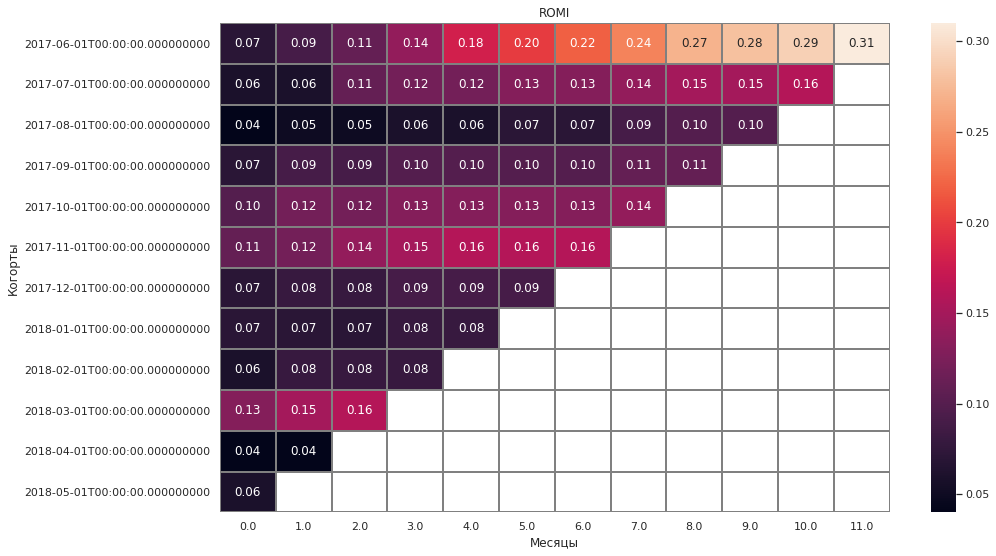

Source 2


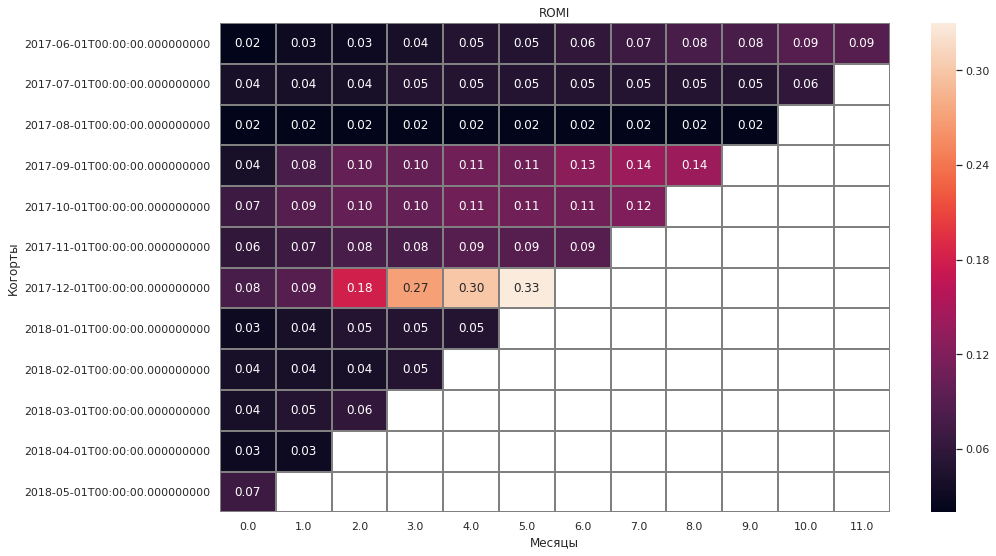

Source 3


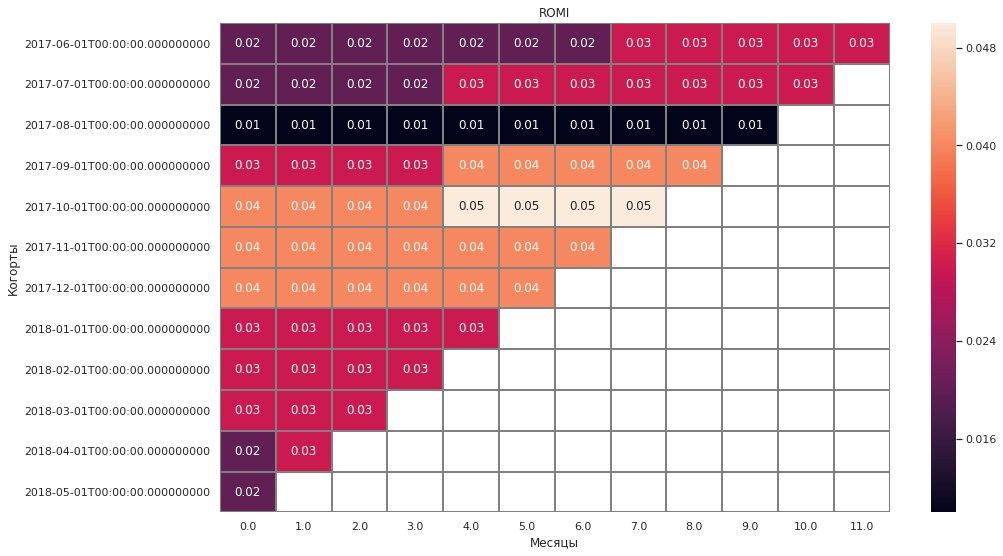

Source 4


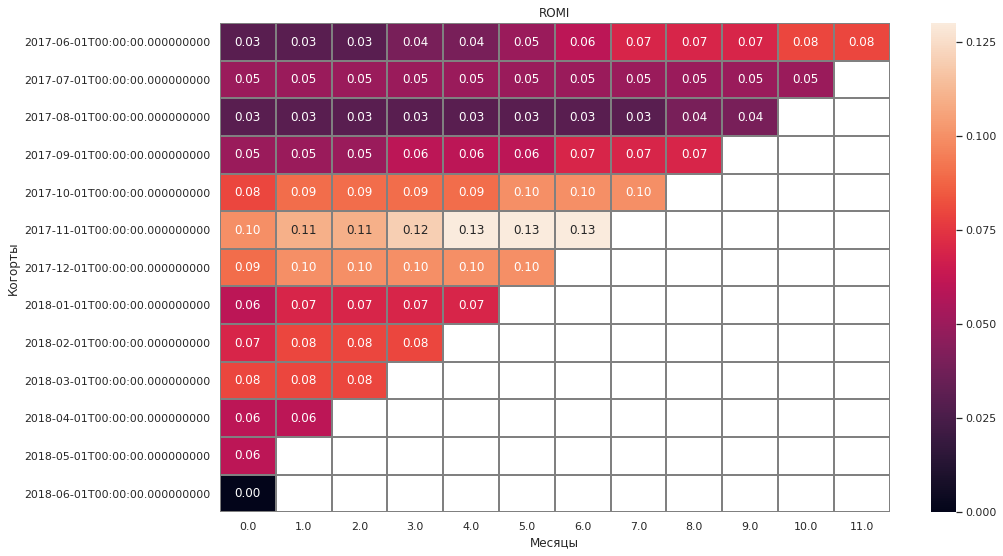

Source 5


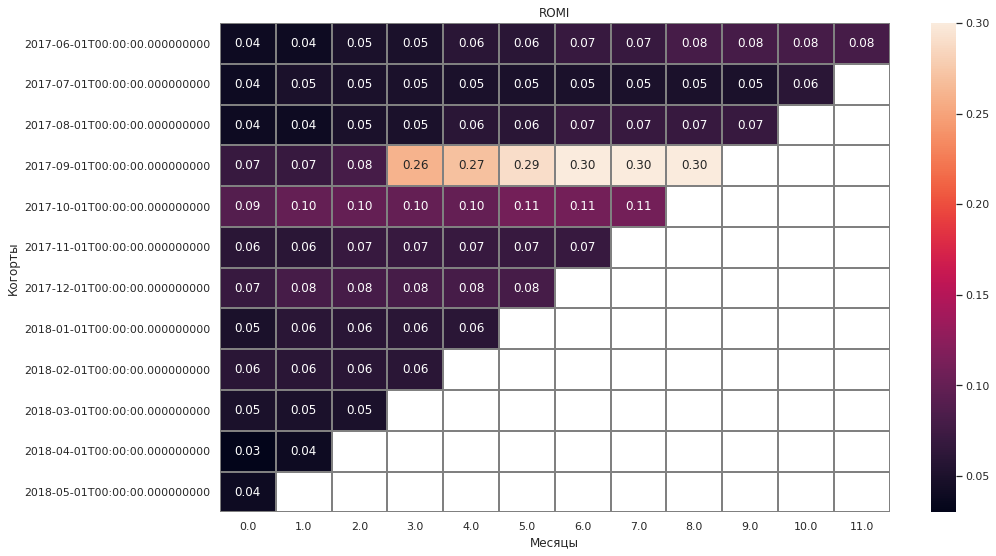

Source 9


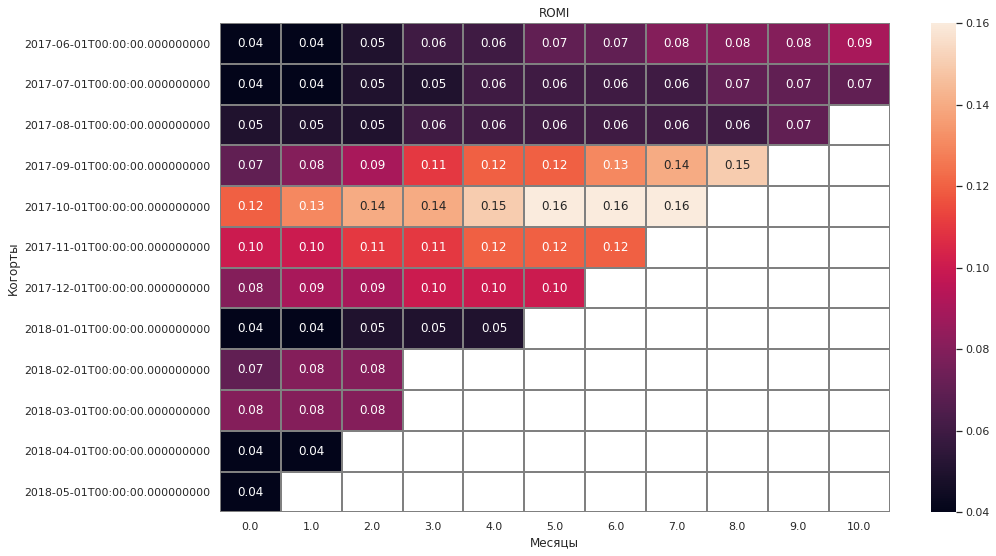

Source 10


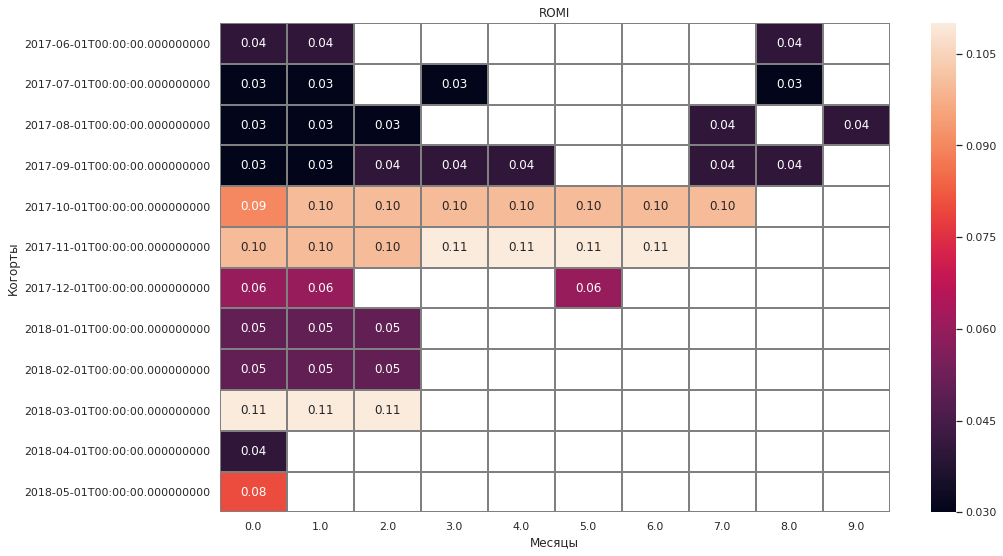

In [420]:
def Romi(sources):
   
    for i in sources:
        print('Source', i)
        source = cohorts_total.query('source_id == @i')
        romi_pivot = source.pivot_table(index='first_order_month', columns='cohorts_age', values='romi', aggfunc='mean')
        romi_pivot = romi_pivot.cumsum(axis=1).round(2)
    
        sns.set(style='white')
        plt.figure(figsize=(15, 9))
    
        sns.heatmap(romi_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
        plt.title('ROMI')
        plt.xlabel('Месяцы')
        plt.ylabel('Когорты')
        plt.show()
    return plt.show()
sources = [1,2,3,4,5,9,10]
Romi(sources)

<div style="border:solid red 2px; padding: 20px"> <h1 style="color:red; margin-bottom:20px">Комментарий ревьювера</h1>
<div class="alert alert-block alert-danger">
<b>Нужно исправить:</b>  Тот случай когда ожидания и реальность неного не сошлись;) Ты декларируешь расчет ROMI по кагортам, но считаешь их по  источникам. В задании 2.3.3. сказано  "Рассчитайте ROMI по когортам в разрезе источников. Сравните окупаемость за одинаковые периоды жизни когорт. Обратите внимание, что клиенты, пришедшие из разных источников, могут иметь разный LTV. Постройте графики, отражающие изменения метрик во времени." 
Тоесть тебе  необходимо:
    
1. Расчитать LTV по источникам (как ты делал в расчете LTV только пользователей нужно разбить по источникам привлечения)
2. Затем расчитать ROMI и построить графики (такиеже тепловые карты как для LTV только для ROMI)

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий ревьювера #2</h1>

<div class="alert alert-block alert-success">
<b>Все ОК:</b> Отлично! Теперь все как надо, а также можно оценить эффективность каждого источника по кагортам! 

Прибыль по источнику и устройству

In [421]:
revenue_by_source_and_device = (orders.merge(visits_by_source, on='uid', how='inner'))\
                                .groupby(['source_id', 'device']).agg({'revenue':'sum'})

In [422]:
revenue_by_source_and_device = revenue_by_source_and_device.reset_index()

In [423]:
visits_by_device = visits.groupby('device').agg({'uid': 'count'})
visits_by_device

,uid
device,
desktop,262565
touch,96833


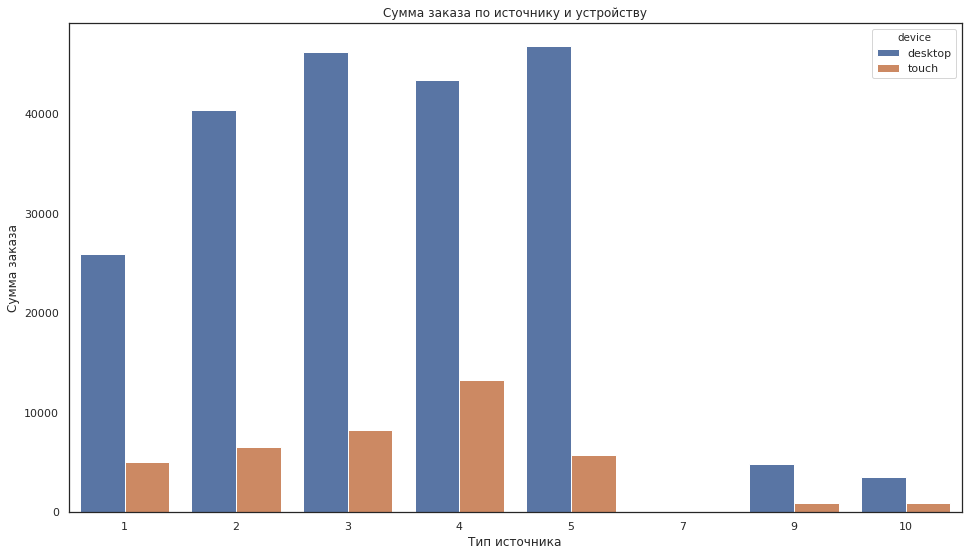

In [424]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="source_id", y="revenue", hue="device", data=revenue_by_source_and_device)
plt.title('Сумма заказа по источнику и устройству')
ax.set_xlabel('Тип источника')
ax.set_ylabel('Сумма заказа')
plt.show()

Вывод : клиентов, пришедших из 3 и 5 источников с ПК в разы больше,чем - с телефона.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий ревьювера</h1>
<div class="alert alert-block alert-success">
<b>Все ОК:</b> Шаг с анализом различий пользователей по платформам необязателен, но молодец что ты его сделал!

ОБЩИЙ ВЫВОД: необходимо сконцетрироваться на 3-м источнике, он имеет большую окупаемость, так же нужно обратить внимание и
    на 2-й канал, он имеет хороший потенциал. Исходя из анализа LTV, CAC, ROMI самая прибыльная аудитория у 2-го
    источника, самый дорогой канал рекламы - 3-й и 5-й, самый большой канал по аудитории и с наименьшими затратами на привлечения
    4-й канал.

<div style="border:solid orange 2px; padding: 20px"> <h1 style="color:orange; margin-bottom:20px">Итоговый комментарий ревьювера</h1>

<div class="alert alert-block alert-warning">
<b>Можно улучшить:</b> Поздарвляю! ты дошел до конца проекта! Но к сожалению не все шаги в нем ты выполнен верно.
Я попрошу тебя внимательно перечитать задание и переделать шаги с красными комментариями. Так же обрати внимане и на желтые комментарии, пусть это и не критичные замечания, но полезные.
    
Удачи!    

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий ревьювера #2</h1>

<div class="alert alert-block alert-success">
<b>Все ОК:</b> Молодец! Отличная работа над ошибками! Все неточности исправлены и теперь этот проект может занять достойноем место в твоем портфолио!
    
Надеюсь мои коммментарии были тебе полезны. Удачи в прохождении курса!    